In [1]:
%load_ext watermark
%watermark

2019-05-28T16:38:43+02:00

CPython 3.6.8
IPython 6.2.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.13.0-46-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


## 1. <a id='carga-del-dataframe'>Carga del DataFrame</a>

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import calendar
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
warnings.filterwarnings('ignore')

In [3]:
df_U_FR = pd.read_pickle('../Data/02.-Creacion-del-DataFrame-df_U_FR.pkl')

df_U_FR.head()

,ds,y
0,2017-05-01,48
1,2017-05-02,2371
2,2017-05-03,2640
3,2017-05-04,2565
4,2017-05-05,1717


Representamos gráficamente la evolución de los envíos de U en Francia.

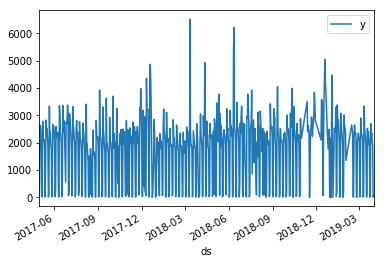

In [4]:
df_U_FR.plot.line(x = 'ds',y = 'y');

## Fechas que faltan

Los días que faltan en df_U_FR es:

In [52]:
missing_dates = pd.date_range(start = '2017-05-01',end = '2019-04-01').difference(df_U_FR['ds'])

missing_dates

DatetimeIndex(['2017-06-24', '2017-12-25', '2018-01-01', '2018-01-06',
               '2018-07-21', '2018-07-22', '2018-07-28', '2018-11-01',
               '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05',
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-10', '2018-11-11', '2018-11-18', '2018-11-24',
               '2018-11-25', '2018-12-01', '2018-12-02', '2018-12-03',
               '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
               '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-16',
               '2018-12-22', '2018-12-23', '2018-12-25', '2019-01-06',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12'],
              dtype='datetime64[ns]', freq=None)

In [53]:
type(missing_dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [54]:
len(missing_dates)

47

In [55]:
df_missing_dates = pd.DataFrame()

df_missing_dates['ds'] = missing_dates

df_missing_dates.head()

,ds
0,2017-06-24
1,2017-12-25
2,2018-01-01
3,2018-01-06
4,2018-07-21


In [56]:
len(df_missing_dates)

47

Función que genera el número de envíos para una fecha que falte.

In [60]:
def new_y_for_date(date,df_temp):
    df_monthdays_for_date = df_temp.loc[(df_temp['ds'].dt.year == date.year) &
                                        (df_temp['ds'].dt.month == date.month) &
                                        (df_temp['ds'].dt.weekday == date.weekday())]
    new_y = df_monthdays_for_date['y'].mean()
    if math.isnan(new_y) == False:
        return int(round(new_y))
    else:
        return np.int64(round(df_U_FR.loc[df_temp['ds'].dt.weekday == date.weekday()]['y'].mean()))

In [61]:
new_y_for_date(datetime.strptime('2017-06-24','%Y-%m-%d'),df_U_FR)

26

Función que genera el número de envíos para un dataframe que contenga fechas que falten.

In [68]:
df_missing_dates['y'] = [new_y_for_date(date,df_U_FR) for date in df_missing_dates['ds']]

df_missing_dates.head()

,ds,y
0,2017-06-24,26
1,2017-12-25,4066
2,2018-01-01,2637
3,2018-01-06,39
4,2018-07-21,52
